Use of machine learning and feature engineering to predict methods clarifying features and inputs different for the ML Process.

Examples include "Handling missing values", "One-hot encoding", "Binning"

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

# intake data
data = fetch_california_housing(as_frame=True)
X = data["data"]
col_names = data["feature_names"]
y = data["target"]

df = pd.DataFrame(X, columns=col_names)


In [2]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


Perform some specific manipulations to existing features in the dataset and creation of new columns
then use of the Pearson coefficient matrix to observe how the new features are correlated.
We want to avoid collinearity between features, to improve accuracy

In [3]:
df['MedInc_Log']=np.log(df["MedInc"])
df['MedInc_Exp']=np.exp(df["MedInc"])
df['HouseAge_Squared']=df["HouseAge"]**2
df['Interaction']=df['MedInc']*df['AveRooms']

# for normalization of the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Population_Normalized'] = scaler.fit_transform(df['Population'].values.reshape(-1,1))

# Columns to keep in the correlation matrix
columns_to_keep = ['MedInc', 'HouseAge', 'AveRooms', 'Population', 'MedInc_Log', 'MedInc_Exp', 'HouseAge_Squared', 'Interaction']

# Compute the correlation matrix
correlation_matrix = df[columns_to_keep].corr()

correlation_matrix

,MedInc,HouseAge,AveRooms,Population,MedInc_Log,MedInc_Exp,HouseAge_Squared,Interaction
MedInc,1.000000,-0.119034,0.326895,0.004834,0.938688,0.349009,-0.101859,0.869603
HouseAge,-0.119034,1.000000,-0.153277,-0.296244,-0.139192,0.039339,0.973022,-0.151144
AveRooms,0.326895,-0.153277,1.000000,-0.072213,0.314303,0.084591,-0.138689,0.689763
Population,0.004834,-0.296244,-0.072213,1.000000,0.032068,-0.033654,-0.272226,-0.030640
MedInc_Log,0.938688,-0.139192,0.314303,0.032068,1.000000,0.189294,-0.123800,0.776515
MedInc_Exp,0.349009,0.039339,0.084591,-0.033654,0.189294,1.000000,0.045589,0.365781
HouseAge_Squared,-0.101859,0.973022,-0.138689,-0.272226,-0.123800,0.045589,1.000000,-0.130000
Interaction,0.869603,-0.151144,0.689763,-0.030640,0.776515,0.365781,-0.130000,1.000000


Following are the synthetic features which can be created to increase the number of features considered for the input to the ML.
This can help to reduce overfit.
Examples are PolynomialFeatures of scikit learn which will use to create polynomial features up to the 3rd power and then fit a simple linear regression model.
Sorting will be done from high to low importance to give a sense of scale of the log-based horizontal axis of the plot.

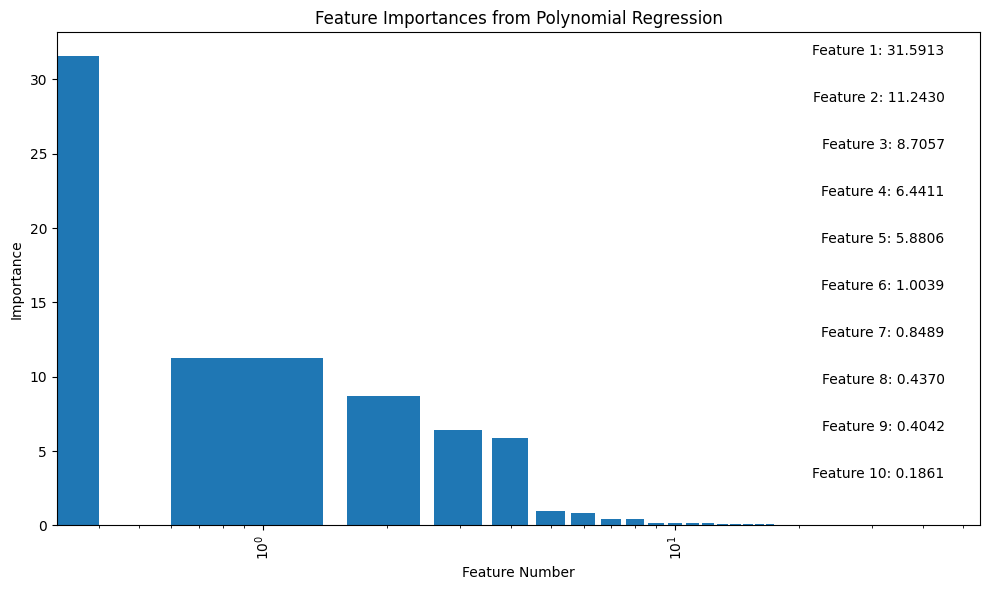

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Apply Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Get feature names
feature_names = [f'feature_{i}' for i in range(X_poly.shape[1])]

# Create a DataFrame with the polynomial features
X_poly_df = pd.DataFrame(X_poly, columns=feature_names)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_poly_df, y)

# Get the feature importances
importances = np.abs(model.coef_)

# Sort the feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xticks(np.arange(0, len(sorted_importances), 5),np.arange(1, len(sorted_importances)+1, 5), rotation='vertical')
plt.xlabel('Feature Number')
plt.ylabel('Importance')
plt.title('Feature Importances from Polynomial Regression')

# Print top 10 features and importances
top_10_features = range(1,11)
top_importances = sorted_importances[:10]

# Calculate the maximum importance value
max_importance = np.max(sorted_importances)

# Position for the stacked labels
label_x = len(sorted_importances) + 1
label_y = max_importance +0.03

# Stacked labels
for i, (features, importance) in enumerate(zip(top_10_features, top_importances)):
    plt.text(label_x, label_y - i*(max_importance / 10), f'Feature {features}: {importance:.4f}', ha='right')

plt.xscale('log')   
plt.tight_layout()
plt.show()

From the above plot we can observe the hierachy of polynomial features and identify the most important, 10 ten values, for the linear regression model.
To better select the most importan features, we can do other tests to find which to select. An example is to look for features which have the highest variance from disciminatory information and to removed them to make the model simpler i.e. setting a variance threshold and chose those above the threshold or recursive feature elimination.

In [6]:
X_poly

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00, ...,
         1.43489440e+03, -4.63007240e+03,  1.49401729e+04],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00, ...,
         1.43337960e+03, -4.62724920e+03,  1.49377284e+04],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00, ...,
         1.43262250e+03, -4.62678400e+03,  1.49426176e+04],
       ...,
       [ 1.70000000e+00,  1.70000000e+01,  5.20554273e+00, ...,
         1.55472490e+03, -4.77970460e+03,  1.46942884e+04],
       [ 1.86720000e+00,  1.80000000e+01,  5.32951289e+00, ...,
         1.55472490e+03, -4.78364760e+03,  1.47185424e+04],
       [ 2.38860000e+00,  1.60000000e+01,  5.25471698e+00, ...,
         1.54999690e+03, -4.77321880e+03,  1.46991376e+04]],
      shape=(20640, 44))

<>:28: SyntaxWarning: invalid escape sequence '\:'
<>:28: SyntaxWarning: invalid escape sequence '\:'
/tmp/ipykernel_2337/1659554425.py:28: SyntaxWarning: invalid escape sequence '\:'
  f'99% value of max variance:\:n{threshold_99:.2e}',


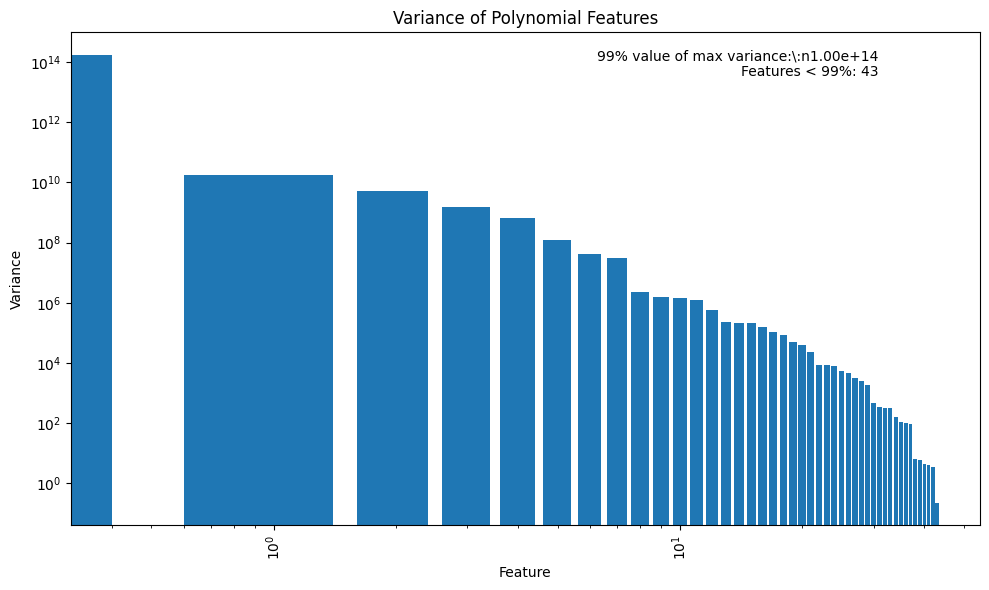

In [7]:
# Calculate the variance for each feature
variances = np.var(X_poly, axis=0)

# Sort the variances in descending order
sorted_indices = np.argsort(variances)[::-1]
sorted_variances = variances[sorted_indices]

# Plot the variances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_variances)), sorted_variances)
plt.xticks(np.arange(len(sorted_variances)), feature_names, rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Variance')
plt.title('Variance of Polynomial Features')

plt.xscale('log') # Set x-axis to logarithmic scale
plt.yscale('log') # Set y-axis to logarithmic scale

# Calculate the 99% value of the top feature variance
top_feature_variance = sorted_variances[0]
threshold_99 = np.percentile(sorted_variances, 99)

# Count features with less variance than the 99% value
count_less_than_99 = np.sum(sorted_variances < threshold_99)

# Plot the 99% value and count inside the plot area
plt.text(len(sorted_variances) * 0.7, threshold_99 * 0.9, 
         f'99% value of max variance:\:n{threshold_99:.2e}', 
         ha='right', va ='bottom')
plt.text(len(sorted_variances) * 0.7, threshold_99 * 0.8,
         f'Features < 99%: {count_less_than_99}', ha ='right', 
         va ='top')
plt.tight_layout()
plt.show()

In [22]:
# And the table summary below

# Print the top 10 features by importance
print("Top 10 Features by Importance:")
sorted_importance_indices = np.argsort(top_importances)[::-1]
for i in sorted_importance_indices[:10]:
    print(f"Feature {i}: Importane = {sorted_importances[i]}")

# Print the top 10 features by variance
print("Top 10 Features by Variance:")
sorted_variances_indices = np.argsort(sorted_variances)[::-1]
for i in sorted_variances_indices[:10]:
    print(f"Feature {i}: Variance = {sorted_variances[i]}")


Top 10 Features by Importance:
Feature 0: Importane = 31.59132843831107
Feature 1: Importane = 11.243025178656437
Feature 2: Importane = 8.705681881611323
Feature 3: Importane = 6.44105892510169
Feature 4: Importane = 5.880632722307628
Feature 5: Importane = 1.0038623398725148
Feature 6: Importane = 0.848898546182203
Feature 7: Importane = 0.4370429859750091
Feature 8: Importane = 0.404150572756117
Feature 9: Importane = 0.1861422742138838
Top 10 Features by Variance:
Feature 0: Variance = 175514716806474.88
Feature 1: Variance = 18165061256.33889
Feature 2: Variance = 5150795943.763443
Feature 3: Variance = 1584600405.7833676
Feature 4: Variance = 639216855.8737442
Feature 5: Variance = 125263252.54549897
Feature 6: Variance = 43444153.761916205
Feature 7: Variance = 31249099.028907493
Feature 8: Variance = 2294475.4098525355
Feature 9: Variance = 1593464.3053048842


For the housing dataset, we perform several exercises of training the model based on different feature sets:the original features, all features created from the exercise of creating a polynomial features up to 3rd power, combinations of the top ten features from importance and variance and finally selecting autonomously features when applying a Greedy algorithm.

Other popular approaches for feature selection is to perform  univariate analysis to score each feature against the target, to identify the most informative featuteres in predicting the 
target variable. Methods to learn about are Mutual Information, ANOVA F-test, Chi-square test.